In [3]:
# Author: Mostafa Rezapour



$\large \color{purple}{\textbf{  Importing libraries     }}$


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")



$\large \color{purple}{\textbf{  Read csv file into a pandas dataframe     }}$
$\large \color{purple}{\textbf{       }}$

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv("Copy of COVID Isolation on Sleep and Health in Healthcare Workers_April 29, 2020_08.17.csv", encoding= 'unicode_escape')


In [3]:
#the total number of missing values 
print(df.isnull().values.sum())

14678


In [4]:
pd.set_option("display.max_columns", None)
df.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q5_6_TEXT,Q6,Q7,Q8,Q8a,Q9,Q9a,Q9b,Q10,Q11,Q11a,Q11b,Q12,Q13,Q14,Q14a,Q15,Q15a,Q16,Q16a,Q16b,Q17,Q17a,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q25a,Q26,Q26a,Q27,Q27a,Q28,Q28a,Q29,Q29a,Q29b
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,What is your age?,What is your gender?,"50 States, D.C. and Puerto Rico",What ethnicity do you consider yourself?,Choose one or more races that you consider you...,Choose one or more races that you consider you...,What is your role in the healthcare field? (e....,Are you a frontline worker providing care for ...,Are you currently conducting your job mostly f...,Which week in March 2020 did you start working...,Are you conducting clinical video visits with ...,Please rate YOUR satisfaction with conducting\...,Please rate your estimation of your PATIENT's ...,Does\nyour work require you to follow a fixed ...,Are children home from school in the house?,How many children are in the home?,How old are the children in the home?,Approximately how many hours did you sleep on ...,Approximately how many hours did you sleep on ...,Has the number of your work hours per week cha...,Please tell us how your work hours per week ha...,Have you varied your work schedule?,Please tell us how you have varied your work s...,Have your sleep patterns changed?,Please tell us how your bedtime has changed,Please tell us how your waketime has changed,Has the number of naps you are taking changed?,Please tell us how the number of the naps have...,Has the amount of alcohol you are consuming\nc...,Please tell us how the amount of alcohol you a...,"In January 2020, approximately how often did y...","In the last month, approximately how often did...","In January 2020, approximately how often did y...","In the last month, approximately how often did...",Has\nthe amount of news you are consuming incr...,How many hours of COVID-19 related news or\nso...,Have\nyou had more screen time (e.g. use of ...,Please tell us how much more screen time you e...,Have you changed your movement/exercise?,Please tell us how your movement/exercise habi...,Has the quality of your diet changed?,Please tell us how your diet has changed?,Has the amount of food you have been eating pe...,Please tell us how the amount of food you have...,Has your mood changed?,Please tell us how your mood has changed. My ...,Please tell us how your mood has worsened
1,3/28/2020 13:24,3/28/2020 13:26,Survey Preview,NaN,100,145,TRUE,3/28/2020 13:26,R_D2zZmZzPFOTHGhj,NaN,NaN,NaN,NaN,42.27090454,-83.72679901,preview,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,Yes,NaN,Yes,Slightly worse,NaN
2,3/30/2020 8:29,3/30/2020 8:32,Survey Preview,NaN,100,147,TRUE,3/30/2020 8:32,R_ZesvyNm3EjoBl2F,NaN,NaN,NaN,NaN,42.27090454,-83.72679901,preview,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,2,NaN,NaN,No,1,NaN,NaN,NaN,NaN,Yes,I am working fewer hours,NaN,NaN,No,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,NaN,No,0-.5 hour,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,NaN
3,3/30/2020 8:39,3/30/2020 8:42,Survey Preview,NaN,100,160,TRUE,3/30/2020 8:42,R_2zT0jHR2F9OOQtk,NaN,NaN,NaN,NaN,42.27090454,-83.72679901,preview,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,1,NaN,NaN,No,1,NaN,NaN,NaN,NaN,Yes,I am working fewer hours,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,I am drinking less alcohol,NaN,NaN,NaN,NaN,No,0-.5 hour,Yes,NaN,Yes,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Moderately worse

In [5]:
df.shape

(915, 64)

In [6]:
df.index

RangeIndex(start=0, stop=915, step=1)

In [7]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q5_6_TEXT', 'Q6', 'Q7', 'Q8', 'Q8a', 'Q9', 'Q9a', 'Q9b', 'Q10', 'Q11',
       'Q11a', 'Q11b', 'Q12', 'Q13', 'Q14', 'Q14a', 'Q15', 'Q15a', 'Q16',
       'Q16a', 'Q16b', 'Q17', 'Q17a', 'Q18', 'Q18a', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q25a', 'Q26', 'Q26a', 'Q27', 'Q27a', 'Q28',
       'Q28a', 'Q29', 'Q29a', 'Q29b'],
      dtype='object')

In [8]:
# missing values
df.isnull().sum()


StartDate      0
EndDate        0
Status         0
IPAddress      5
Progress       0
            ... 
Q28           77
Q28a         480
Q29           76
Q29a         311
Q29b         393
Length: 64, dtype: int64

In [9]:
#Drop rows where NaN appears in "Please tell us how your mood has changed.  My mood has been:" column because it is going to be our target  
df2=df.dropna(subset=['Q18a'])
# Drop Unnecessary columns
df2=df2.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q4', 'Q5', 'Q5_6_TEXT', 'Q7','Q17a', 'Q6','Q29b' ], axis=1)

df2

,Q1,Q2,Q3,Q8,Q8a,Q9,Q9a,Q9b,Q10,Q11,Q11a,Q11b,Q12,Q13,Q14,Q14a,Q15,Q15a,Q16,Q16a,Q16b,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q25a,Q26,Q26a,Q27,Q27a,Q28,Q28a,Q29,Q29a
0,What is your age?,What is your gender?,"50 States, D.C. and Puerto Rico",Are you currently conducting your job mostly f...,Which week in March 2020 did you start working...,Are you conducting clinical video visits with ...,Please rate YOUR satisfaction with conducting\...,Please rate your estimation of your PATIENT's ...,Does\nyour work require you to follow a fixed ...,Are children home from school in the house?,How many children are in the home?,How old are the children in the home?,Approximately how many hours did you sleep on ...,Approximately how many hours did you sleep on ...,Has the number of your work hours per week cha...,Please tell us how your work hours per week ha...,Have you varied your work schedule?,Please tell us how you have varied your work s...,Have your sleep patterns changed?,Please tell us how your bedtime has changed,Please tell us how your waketime has changed,Has the number of naps you are taking changed?,Has the amount of alcohol you are consuming\nc...,Please tell us how the amount of alcohol you a...,"In January 2020, approximately how often did y...","In the last month, approximately how often did...","In January 2020, approximately how often did y...","In the last month, approximately how often did...",Has\nthe amount of news you are consuming incr...,How many hours of COVID-19 related news or\nso...,Have\nyou had more screen time (e.g. use of ...,Please tell us how much more screen time you e...,Have you changed your movement/exercise?,Please tell us how your movement/exercise habi...,Has the quality of your diet changed?,Please tell us how your diet has changed?,Has the amount of food you have been eating pe...,Please tell us how the amount of food you have...,Has your mood changed?,Please tell us how your mood has changed. My ...
3,NaN,NaN,NaN,Yes,NaN,1,NaN,NaN,No,1,NaN,NaN,NaN,NaN,Yes,I am working fewer hours,NaN,NaN,Yes,NaN,NaN,NaN,Yes,I am drinking less alcohol,NaN,NaN,NaN,NaN,No,0-.5 hour,Yes,NaN,Yes,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Moderately worse
5,44,Female,NaN,Yes,Week 4 March 22-28,1,Somewhat satisfied,Somewhat satisfied,No,2,NaN,NaN,8,9,Yes,I am working fewer hours,NaN,NaN,Yes,I am going to bed later,I am waking up later,Yes,Yes,I am drinking more alcohol,NaN,NaN,NaN,NaN,Yes,0-.5 hour,Yes,0-0.5 hour,No,NaN,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Slightly worse
6,41,Female,NaN,Yes,Week 4 March 22-28,1,Somewhat satisfied,Somewhat satisfied,No,1,NaN,NaN,7,8,Yes,I am working fewer hours,NaN,NaN,Yes,I am going to bed later,I am waking up later,No,Yes,I am drinking more alcohol,NaN,NaN,NaN,NaN,Yes,1-2 hours,Yes,0.51-1 hour,Yes,I am exercising/moving more,Yes,I am eating less healthy foods,No,NaN,Yes,Much worse
8,35,Female,NaN,Yes,Week 4 March 22-28,1,Extremely satisfied,Somewhat satisfied,No,2,NaN,NaN,7,8,No,NaN,NaN,NaN,No,NaN,NaN,No,Yes,I am drinking less alcohol,NaN,NaN,NaN,NaN,Yes,0.51- 1 hour,Yes,0.51-1 hour,Yes,I am exercising/moving more,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Slightly worse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,29,Female,Georgia,Yes,Week 2 March 8-14,Not applicable,NaN,NaN,Yes,Not applicable,NaN,NaN,8-Jun,8-Jun,No,NaN,No,NaN,Yes,I am going to bed later,I waking up earlier,No,Yes,I am drinking more alcohol,Once a month or less,2-4 times a month,Never,Never,Yes,2-3 hours,Yes,3+ hours,Yes,I am exercising/moving less,Yes,I am eating less healthy foods,Yes,I am eating more food each day,Yes,Moderately worse
895,44,Male,Michigan,Yes,Week 5 March 29- April 4,Yes,Extremely satisfied,Extremely satisfied,No,Yes,2,"Under 12 years old,12-17 year

In [10]:
# missing values
df2.isnull().sum()


Q1        1
Q2        1
Q3        5
Q8        0
Q8a     103
Q9        1
Q9a     188
Q9b     230
Q10       0
Q11       0
Q11a    156
Q11b    156
Q12       1
Q13       1
Q14       0
Q14a    112
Q15       5
Q15a     91
Q16       0
Q16a     72
Q16b     72
Q17       1
Q18       0
Q18a      0
Q19       5
Q20       5
Q21       5
Q22       5
Q23       0
Q24       0
Q25       0
Q25a    104
Q26       0
Q26a     50
Q27       0
Q27a     82
Q28       0
Q28a    109
Q29       0
Q29a     51
dtype: int64

In [11]:
#the total number of missing values 
print(df2.isnull().values.sum())

1612


In [12]:
# Dropping the columns that contain more than "thresh" NaN
df22=df2.dropna(thresh=250,axis=1)
df22
# Dropping the rows that contain more than "thresh" NaN
df3=df22.dropna(thresh=26)
df3
#Dropping row 0
df3=df3.drop(df3.index[0])
df3

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
12,44,Female,Michigan,Yes,1,Yes,Not applicable,8,9,Yes,Yes,Yes,No,Yes,I am drinking more alcohol,2-3 times a week,4 or more times a week,Never,Never,No,0-.5 hour,Yes,Yes,Yes,Yes,Yes
13,31,Male,Iowa,No,2,No,Not applicable,6,5.5,Yes,No,No,No,Yes,I am drinking more alcohol,2-3 times a week,2-3 times a week,Never,Never,Yes,1-2 hours,Yes,No,Yes,No,Yes
16,39,Female,Michigan,Yes,2,Yes,Yes,7,7,Yes,No,Yes,No,Yes,I am drinking more alcohol,2-3 times a week,4 or more times a week,Never,Never,Yes,0.51- 1 hour,No,No,Yes,Yes,Yes
18,28,Female,Michigan,Yes,2,Yes,Yes,7,7,No,Yes,No,No,Yes,I am drinking more alcohol,Once a month or less,2-4 times a month,Never,Never,Yes,1-2 hours,Yes,Yes,No,Yes,Yes
21,29,Female,Michigan,Yes,2,No,Not applicable,7,6,No,No,Yes,Yes,Yes,I am drinking more alcohol,Once a month or less,4 or more times a week,Never,Never,Yes,1-2 hours,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,29,Female,Georgia,Yes,Not applicable,Yes,Not applicable,8-Jun,8-Jun,No,No,Yes,No,Yes,I am drinking more alcohol,Once a month or less,2-4 times a month,Never,Never,Yes,2-3 hours,Yes,Yes,Yes,Yes,Yes
895,44,Male,Michigan,Yes,Yes,No,Yes,7,7.5,Yes,Yes,No,No,Yes,I am drinking more alcohol,2-3 times a week,2-3 times a week,Never,Never,No,0-.5 hour,No,Yes,No,Yes,No
896,47,Female,California,Yes,Yes,No,Yes,6,7,Yes,Yes,Yes,Yes,Yes,I am drinking more alcohol,2-4 times a month,2-3 times a week,Never,Never,Yes,3+ hours,Yes,Yes,Yes,Yes,Yes
897,58,Female,Michigan,No,No,No,No,9-Aug,10-Sep,Yes,Yes,Yes,No,Yes,I am drinking more alcohol,2-4 times a month,2-3 times a week,Never,Never,Yes,2-3 hours,Yes,Yes,Yes,Yes,Yes


In [13]:
df3.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
      dtype='object')

In [14]:
df3.shape

(273, 26)

In [15]:
# missing values
df3.isnull().sum()

Q1      0
Q2      0
Q3      0
Q8      0
Q9      0
Q10     0
Q11     0
Q12     0
Q13     0
Q14     0
Q15     0
Q16     0
Q17     0
Q18     0
Q18a    0
Q19     0
Q20     0
Q21     0
Q22     0
Q23     0
Q24     0
Q25     0
Q26     0
Q27     0
Q28     0
Q29     0
dtype: int64

In [16]:
#the total number of missing values 
print(df3.isnull().values.sum())

0


In [17]:
df3.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
      dtype='object')

# Nominal Features Encoding

In [18]:
df3['Q1'].unique()

array(['44', '31', '39', '28', '29', '32', '43', '59', '25', '42', '22',
       '41', '58', '35', '30', '38', '21', '33', '67', '24', '45', '27',
       '49', '48', '57', '53', '47', '34', '36', '52', '55', '66', '68',
       '26', '37', '69', '40', '75', '70', '62', '23', '20', '50', '60',
       '61', '46', '51', '81', '71', '63', '72', '54', '64', '56', '65'],
      dtype=object)

In [19]:
df3['Q2'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [20]:
df3['Q3'].unique()

array(['Michigan', 'Iowa', 'Georgia', 'New York', 'Illinois',
       'West Virginia', 'Utah', 'Pennsylvania', 'Maryland', 'Ohio',
       'I do not reside in the United States', 'Minnesota', 'Colorado',
       'Connecticut', 'Louisiana', 'Missouri', 'Florida', 'Puerto Rico',
       'Virginia', 'Indiana', 'California', 'Washington', 'Kansas',
       'Alabama', 'Massachusetts', 'North Carolina', 'Texas',
       'South Carolina', 'Oregon'], dtype=object)

In [21]:
df3.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
      dtype='object')

In [22]:
df3['Q8'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df3['Q9'].unique()

array(['1', '2', 'Yes', 'Not applicable', 'No', 'No,Not applicable'],
      dtype=object)

In [24]:
df['Q9'].unique()

array(['Are you conducting clinical video visits with your patients from your home?',
       nan, '2', '1', '1,2', 'Yes', 'Not applicable', 'No',
       'No,Not applicable', 'Yes,Not applicable', 'Yes,No'], dtype=object)

In [25]:
df3['Q10'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df3['Q11'].unique()

array(['Not applicable', 'Yes', 'No'], dtype=object)

In [27]:
df['Q11'].unique()

array(['Are children home from school in the house?', nan, '1', '2',
       'Not applicable', 'Yes', 'No'], dtype=object)

In [28]:
df3.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29'],
      dtype='object')

In [29]:
df3['Q14'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df['Q14'].unique()

array(['Has the number of your work hours per week changed?', nan, 'Yes',
       'No'], dtype=object)

In [31]:
df3['Q15'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df['Q15'].unique()

array(['Have you varied your work schedule?', nan, 'Yes', 'No'],
      dtype=object)

In [33]:
df3['Q16'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df['Q16'].unique()

array(['Have your sleep patterns changed?', 'Yes', 'No', nan],
      dtype=object)

In [35]:
df3['Q17'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df['Q17'].unique()

array(['Has the number of naps you are taking changed?', nan, 'No', 'Yes'],
      dtype=object)

In [37]:
df3['Q18'].unique()

array(['Yes'], dtype=object)

In [38]:
df['Q18'].unique()

array(['Has the amount of alcohol you are consuming\nchanged?', 'Yes',
       'No', nan], dtype=object)

In [39]:
df3['Q19'].unique()

array(['2-3 times a week', 'Once a month or less', 'Never',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [40]:
df['Q19'].unique()

array(['In January 2020, approximately how often did you have a drink containing alcohol?',
       nan, '2-3 times a week', '2-4 times a month',
       'Once a month or less', '4 or more times a week', 'Never'],
      dtype=object)

In [41]:
df3['Q23'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df['Q23'].unique()

array(['Has\nthe amount of news you are consuming increased since the end of Feb, 2020?',
       nan, 'No', 'Yes'], dtype=object)

In [43]:
df3['Q25'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df['Q25'].unique()

array(['Have\nyou had more \x93screen time\x94 (e.g. use of smartphone, tablet, etc.) around\nbedtime?',
       nan, 'No', 'Yes'], dtype=object)

In [45]:
df3['Q26'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df['Q26'].unique()

array(['Have you changed your movement/exercise?', 'Yes', 'No', nan],
      dtype=object)

In [47]:
df3['Q27'].unique()

array(['Yes', 'No'], dtype=object)

In [48]:
df['Q27'].unique()

array(['Has the quality of your diet changed?', 'Yes', 'No', nan],
      dtype=object)

In [49]:
df3['Q28'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df['Q28'].unique()

array(['Has the amount of food you have been eating per day changed?',
       'Yes', 'No', nan], dtype=object)

In [51]:
df3['Q29'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df['Q29'].unique()

array(['Has your mood changed?', 'Yes', 'No', nan], dtype=object)

# Ordinal Feature

In [53]:
df3['Q12'].unique()

array(['8', '6', '7', '7.75', '7:15', '6-May', '10', '1.5', '9', '8-Jul',
       '7-Jun', '7.5', 'seven', '6.5', '5', '8.5', '10-Aug', '9-Aug',
       '5.7', '9-Jul', '4', '7 hours', '7-7.5', '7.3', '8-Jun'],
      dtype=object)

In [54]:
df3['Q13'].unique()

array(['9', '5.5', '7', '6', '8', '7:30', '7.5', '6-May', '5-Apr', '4',
       '6.5', '5', '4.5', 'seven', '7-Jun', '8-May', '10', 'Na', '8.5',
       '9.5', '10-May', '6 (but much more variability)', '6 to 7',
       '8-Jul', '8-Jun', '10-Aug', '4.3', '7.45', '3', '7-7.5', '10-Sep'],
      dtype=object)

In [55]:
df3['Q19'].unique()

array(['2-3 times a week', 'Once a month or less', 'Never',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [56]:
df3['Q20'].unique()

array(['4 or more times a week', '2-3 times a week', '2-4 times a month',
       'Never', 'Once a month or less'], dtype=object)

In [57]:
df3['Q21'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [58]:
df3['Q22'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [59]:
df3['Q24'].unique()

array(['0-.5 hour', '1-2 hours', '0.51- 1 hour', '2-3 hours', '3+ hours'],
      dtype=object)

In [60]:
df3

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
12,44,Female,Michigan,Yes,1,Yes,Not applicable,8,9,Yes,Yes,Yes,No,Yes,I am drinking more alcohol,2-3 times a week,4 or more times a week,Never,Never,No,0-.5 hour,Yes,Yes,Yes,Yes,Yes
13,31,Male,Iowa,No,2,No,Not applicable,6,5.5,Yes,No,No,No,Yes,I am drinking more alcohol,2-3 times a week,2-3 times a week,Never,Never,Yes,1-2 hours,Yes,No,Yes,No,Yes
16,39,Female,Michigan,Yes,2,Yes,Yes,7,7,Yes,No,Yes,No,Yes,I am drinking more alcohol,2-3 times a week,4 or more times a week,Never,Never,Yes,0.51- 1 hour,No,No,Yes,Yes,Yes
18,28,Female,Michigan,Yes,2,Yes,Yes,7,7,No,Yes,No,No,Yes,I am drinking more alcohol,Once a month or less,2-4 times a month,Never,Never,Yes,1-2 hours,Yes,Yes,No,Yes,Yes
21,29,Female,Michigan,Yes,2,No,Not applicable,7,6,No,No,Yes,Yes,Yes,I am drinking more alcohol,Once a month or less,4 or more times a week,Never,Never,Yes,1-2 hours,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,29,Female,Georgia,Yes,Not applicable,Yes,Not applicable,8-Jun,8-Jun,No,No,Yes,No,Yes,I am drinking more alcohol,Once a month or less,2-4 times a month,Never,Never,Yes,2-3 hours,Yes,Yes,Yes,Yes,Yes
895,44,Male,Michigan,Yes,Yes,No,Yes,7,7.5,Yes,Yes,No,No,Yes,I am drinking more alcohol,2-3 times a week,2-3 times a week,Never,Never,No,0-.5 hour,No,Yes,No,Yes,No
896,47,Female,California,Yes,Yes,No,Yes,6,7,Yes,Yes,Yes,Yes,Yes,I am drinking more alcohol,2-4 times a month,2-3 times a week,Never,Never,Yes,3+ hours,Yes,Yes,Yes,Yes,Yes
897,58,Female,Michigan,No,No,No,No,9-Aug,10-Sep,Yes,Yes,Yes,No,Yes,I am drinking more alcohol,2-4 times a month,2-3 times a week,Never,Never,Yes,2-3 hours,Yes,Yes,Yes,Yes,Yes


In [61]:
# create excel writer object
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df3.to_excel(writer)
# save the excel
writer.save()


Text(0.5, 0, 'Count')

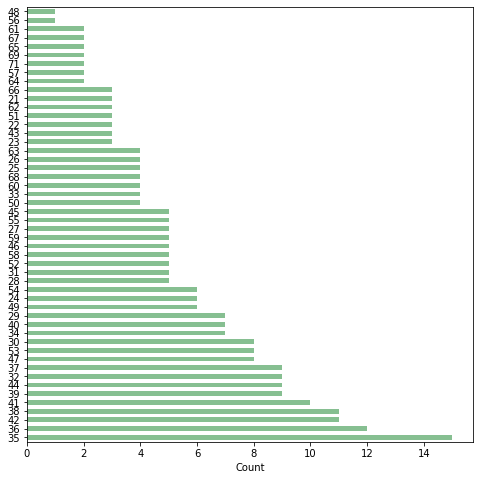

In [62]:
df3['Q1'].value_counts()[:50].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [63]:
df['Q2']

0      What is your gender?
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
910                    Male
911                  Female
912                  Female
913                  Female
914                  Female
Name: Q2, Length: 915, dtype: object

Text(0.5, 0, 'Count')

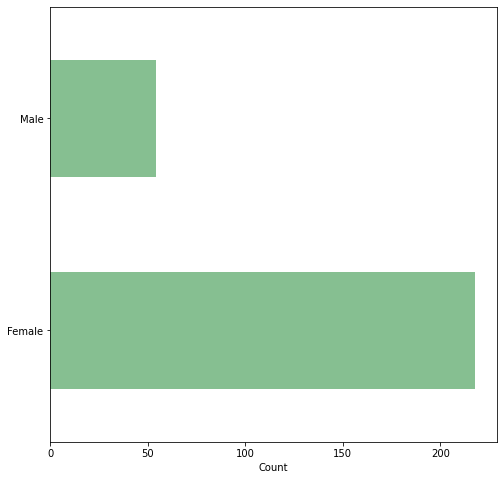

In [64]:
df3['Q2'].value_counts()[:2].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [65]:
df['Q3']

0      50 States, D.C. and Puerto Rico
1                                  NaN
2                                  NaN
3                                  NaN
4                                  NaN
                    ...               
910                            Florida
911                           Michigan
912                           Michigan
913                          Wisconsin
914                           Michigan
Name: Q3, Length: 915, dtype: object

Text(0.5, 0, 'Count')

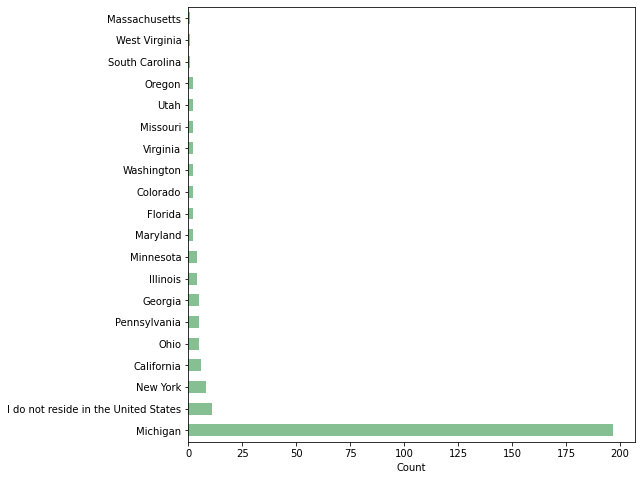

In [66]:
df3['Q3'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [67]:
df['Q8']

0      Are you currently conducting your job mostly f...
1                                                    NaN
2                                                     No
3                                                    Yes
4                                                    NaN
                             ...                        
910                                                   No
911                                                  Yes
912                                                   No
913                                                   No
914                                                   No
Name: Q8, Length: 915, dtype: object

Text(0.5, 0, 'Count')

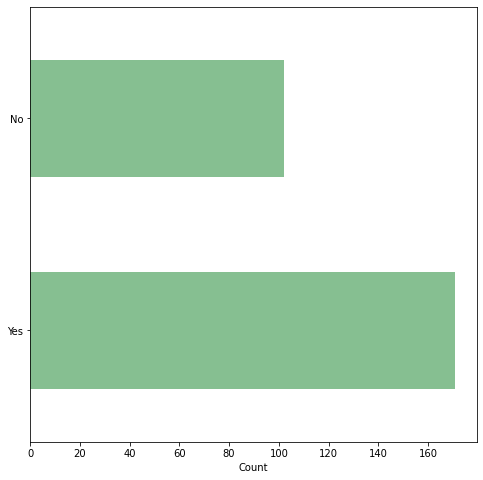

In [68]:
df3['Q8'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [69]:
df['Q9']

0      Are you conducting clinical video visits with ...
1                                                    NaN
2                                                      2
3                                                      1
4                                                    NaN
                             ...                        
910                                       Not applicable
911                                       Not applicable
912                                    No,Not applicable
913                                                   No
914                                       Not applicable
Name: Q9, Length: 915, dtype: object

Text(0.5, 0, 'Count')

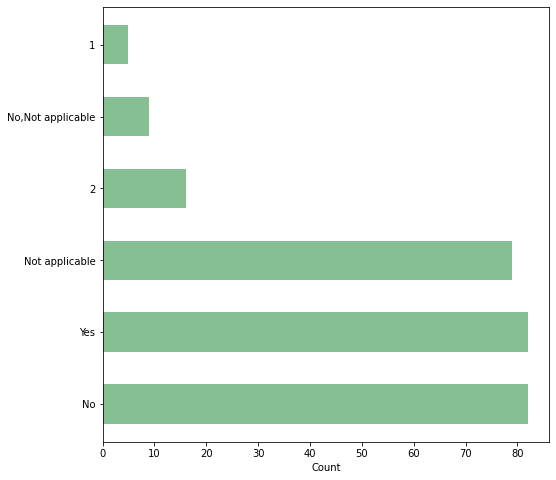

In [70]:
df3['Q9'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [71]:
df['Q10']

0      Does\nyour work require you to follow a fixed ...
1                                                    NaN
2                                                     No
3                                                     No
4                                                    NaN
                             ...                        
910                                                   No
911                                                  Yes
912                                                  NaN
913                                                  NaN
914                                                   No
Name: Q10, Length: 915, dtype: object

Text(0.5, 0, 'Count')

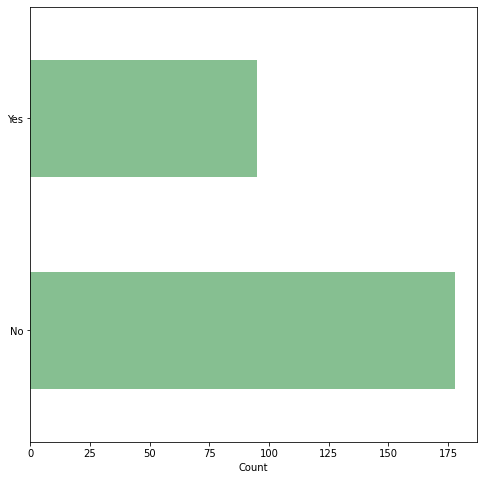

In [72]:
df3['Q10'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [73]:
df['Q11']

0      Are children home from school in the house?
1                                              NaN
2                                                1
3                                                1
4                                              NaN
                          ...                     
910                                 Not applicable
911                                             No
912                                            NaN
913                                            NaN
914                                            Yes
Name: Q11, Length: 915, dtype: object

Text(0.5, 0, 'Count')

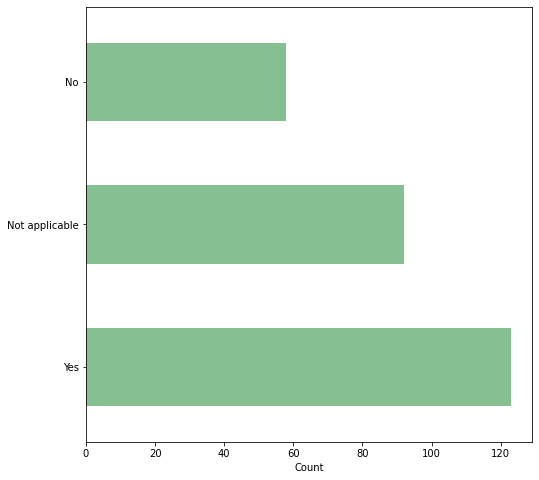

In [74]:
df3['Q11'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [75]:
df['Q12']

0      Approximately how many hours did you sleep on ...
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
910                                                  NaN
911                                                  7.5
912                                                  NaN
913                                                  NaN
914                                                7-Jun
Name: Q12, Length: 915, dtype: object

Text(0.5, 0, 'Count')

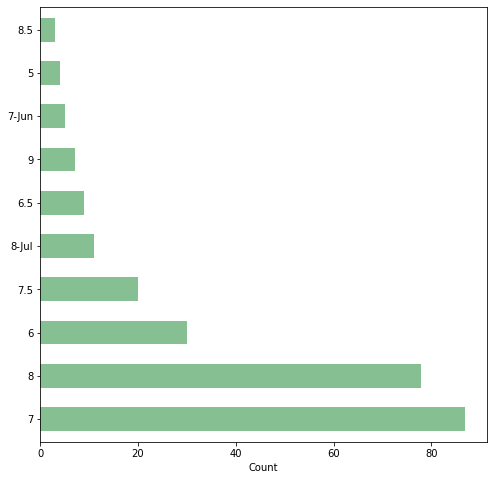

In [76]:
df3['Q12'].value_counts()[:10].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [77]:
df['Q14']

0      Has the number of your work hours per week cha...
1                                                    NaN
2                                                    Yes
3                                                    Yes
4                                                    NaN
                             ...                        
910                                                  NaN
911                                                   No
912                                                  NaN
913                                                  NaN
914                                                   No
Name: Q14, Length: 915, dtype: object

Text(0.5, 0, 'Count')

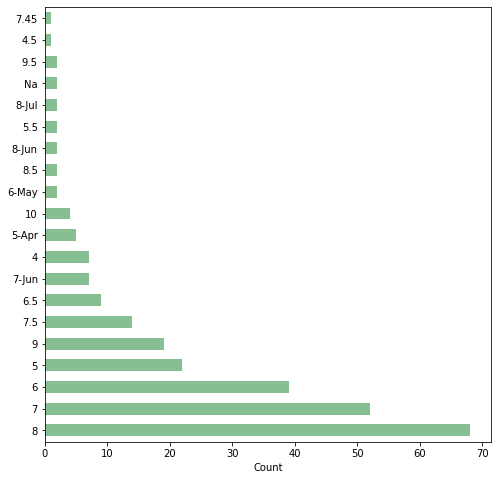

In [78]:
df3['Q13'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

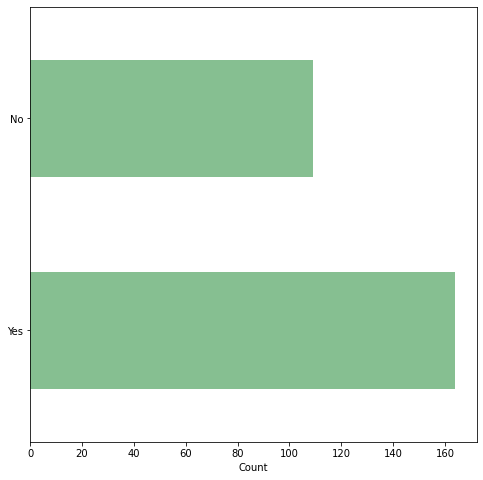

In [79]:
df3['Q14'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


In [80]:
df['Q15']

0      Have you varied your work schedule?
1                                      NaN
2                                      NaN
3                                      NaN
4                                      NaN
                      ...                 
910                                    NaN
911                                     No
912                                    NaN
913                                    NaN
914                                    Yes
Name: Q15, Length: 915, dtype: object

Text(0.5, 0, 'Count')

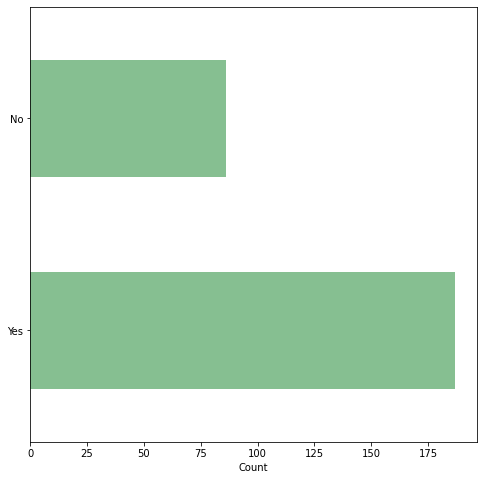

In [81]:
df3['Q15'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

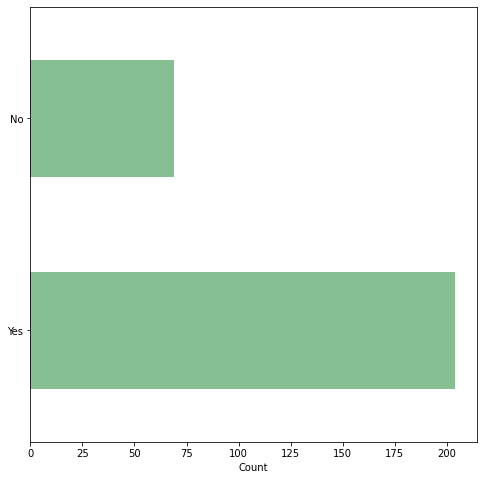

In [82]:
df3['Q16'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

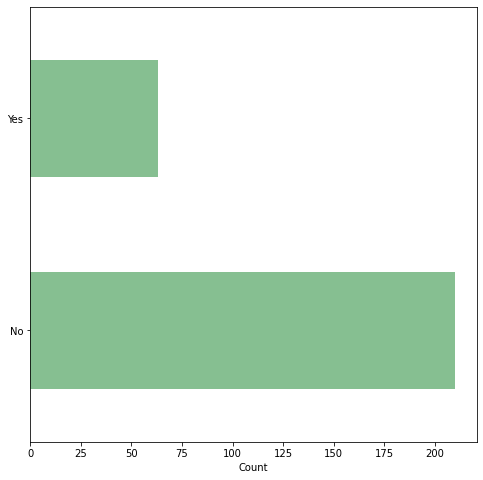

In [83]:
df3['Q17'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

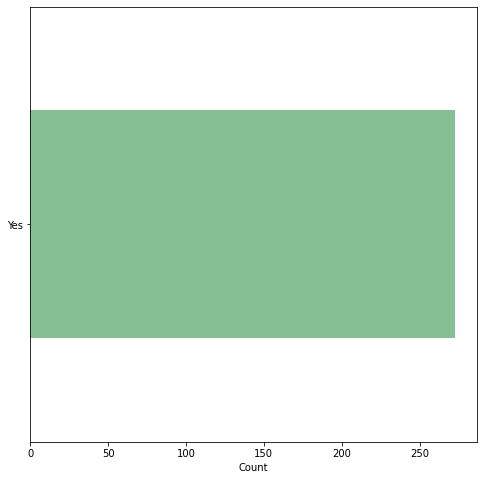

In [84]:
df3['Q18'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

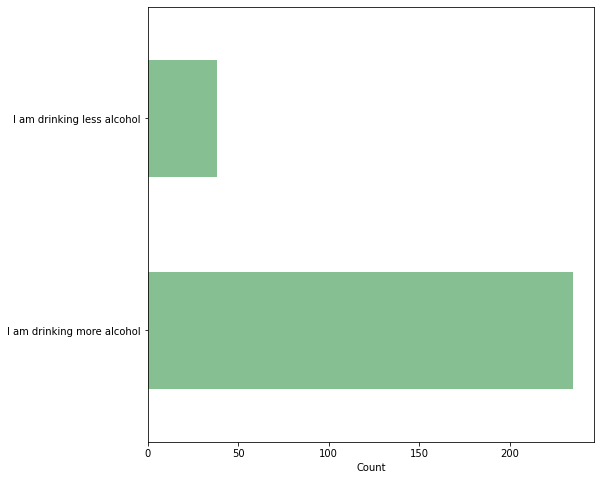

In [85]:
df3['Q18a'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

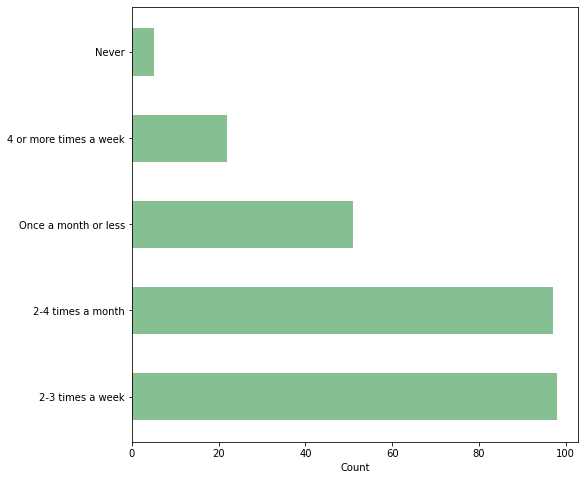

In [86]:
df3['Q19'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

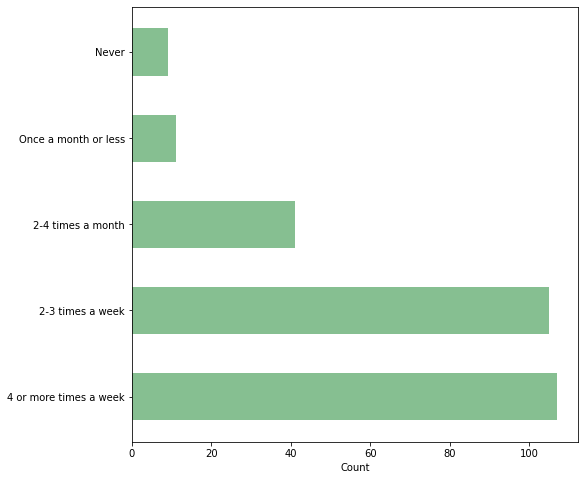

In [87]:
df3['Q20'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

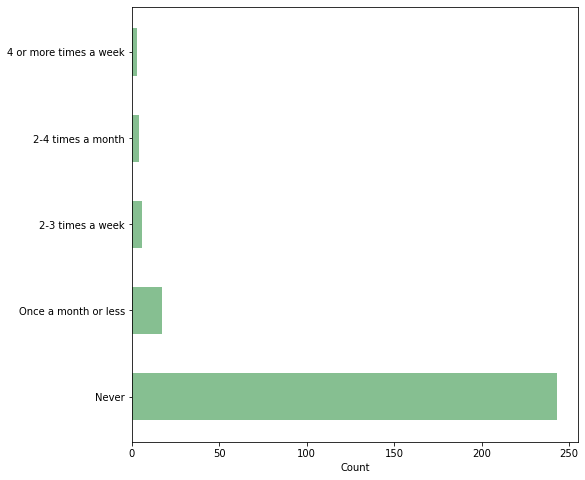

In [88]:
df3['Q21'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

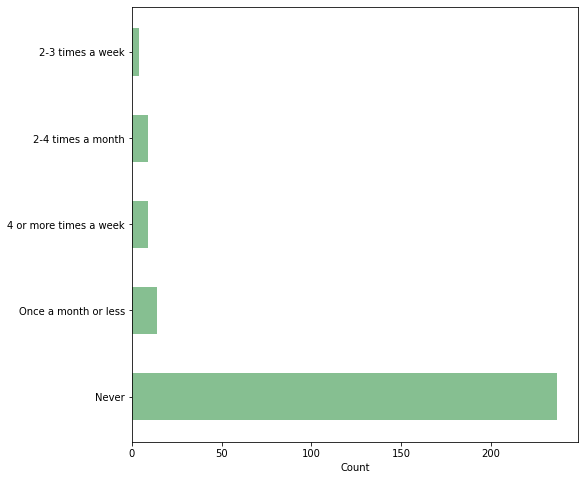

In [89]:
df3['Q22'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

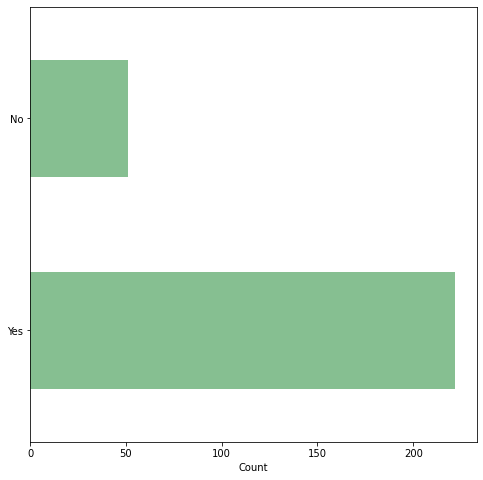

In [90]:
df3['Q23'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

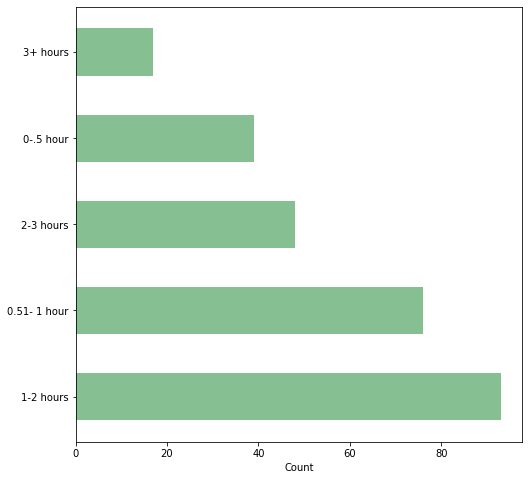

In [91]:
df3['Q24'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

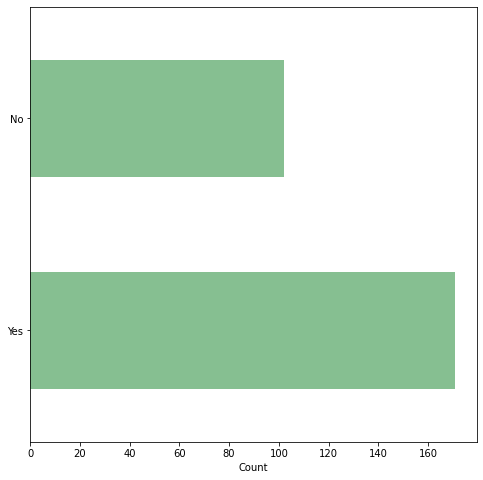

In [92]:
df3['Q25'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

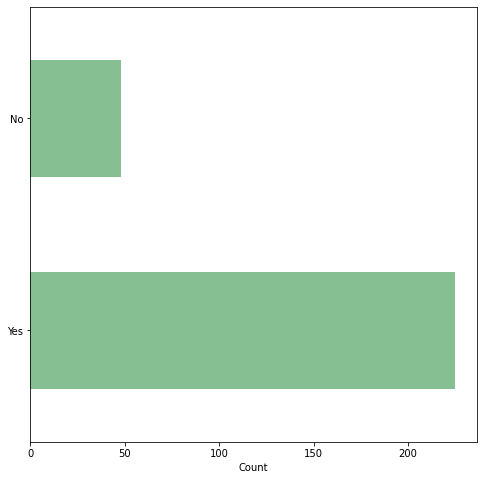

In [93]:
df3['Q26'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

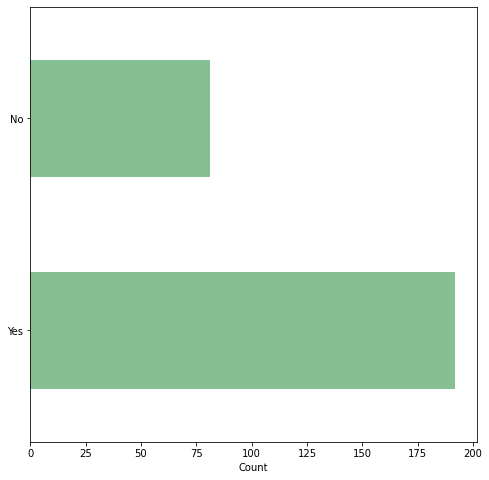

In [94]:
df3['Q27'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

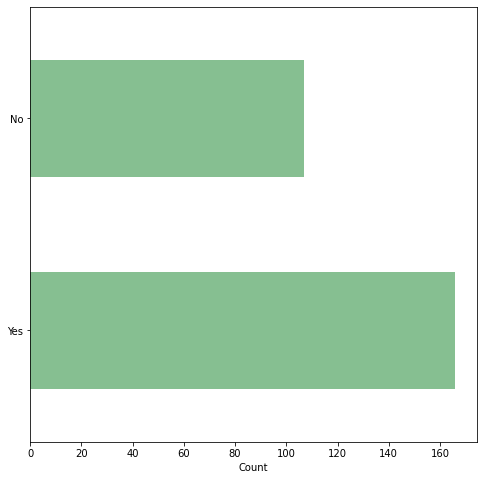

In [95]:
df3['Q28'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.55)
plt.xlabel('Count')


Text(0.5, 0, 'Count')

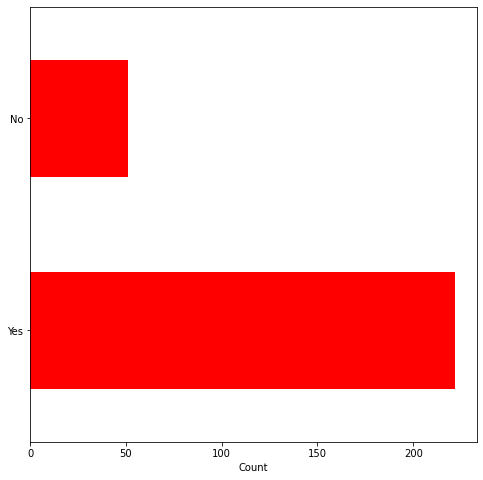

In [96]:
df3['Q29'].value_counts()[:20].plot(kind='barh', figsize=(8, 8), color='red', zorder=2, width=0.55)
plt.xlabel('Count')


We Now Encode the variables categorical values into numeric values

In [97]:
df3['Q1'].unique()

array(['44', '31', '39', '28', '29', '32', '43', '59', '25', '42', '22',
       '41', '58', '35', '30', '38', '21', '33', '67', '24', '45', '27',
       '49', '48', '57', '53', '47', '34', '36', '52', '55', '66', '68',
       '26', '37', '69', '40', '75', '70', '62', '23', '20', '50', '60',
       '61', '46', '51', '81', '71', '63', '72', '54', '64', '56', '65'],
      dtype=object)

In [98]:
Q1_mapping={'44':4, '31':3, '39':3, '28':2, '29':2, '32':3, '43':4, '59':5, '25':2, '42':4, '22':2,
       '41':4, '58':5, '35':3, '30':3, '38':3, '21':2, '33':3, '67':6, '24':2, '45':4, '27':2,
       '49':4, '48':4, '57':5, '53':5, '47':4, '34':3, '36':3, '52':5, '55':5, '66':6, '68':6,
       '26':2, '37':3, '69':6, '40':4, '75':7, '70':7, '62':6, '23':2, '20':2, '50':5, '60':6,
       '61':6, '46':4, '51':5, '81':8, '71':7, '63':6, '72':7, '54':5, '64':6, '56':5, '65':6 }
df3['Q1']= df3['Q1'].map(Q1_mapping)
df3['Q1']

12     4
13     3
16     3
18     2
21     2
      ..
894    2
895    4
896    4
897    5
908    6
Name: Q1, Length: 273, dtype: int64

In [325]:
len(df4[(df4['Q18a']==2)&(df4['Q1']==1)])/len(df4)*100

0.0

In [99]:
# missing values
df3['Q1'].isnull().sum()

0

In [100]:
df3['Q2'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [101]:
Q2_mapping={ 'Female':1,
       'Male':2, 'Prefer not to say':0 }
df3['Q2']= df3['Q2'].map(Q2_mapping)
df3['Q2']

12     1
13     2
16     1
18     1
21     1
      ..
894    1
895    2
896    1
897    1
908    1
Name: Q2, Length: 273, dtype: int64

In [308]:
len(df4[(df4['Q18a']==2)&(df4['Q2']==0)])/len(df4)*100

0.3663003663003663

In [303]:
26/273*100


9.523809523809524

In [300]:
len(df4[df4['Q2']==0])

1

In [102]:
# missing values
df3['Q2'].isnull().sum()

0

In [103]:
df3['Q3'].unique()

array(['Michigan', 'Iowa', 'Georgia', 'New York', 'Illinois',
       'West Virginia', 'Utah', 'Pennsylvania', 'Maryland', 'Ohio',
       'I do not reside in the United States', 'Minnesota', 'Colorado',
       'Connecticut', 'Louisiana', 'Missouri', 'Florida', 'Puerto Rico',
       'Virginia', 'Indiana', 'California', 'Washington', 'Kansas',
       'Alabama', 'Massachusetts', 'North Carolina', 'Texas',
       'South Carolina', 'Oregon'], dtype=object)

In [104]:
Q3_mapping={'Michigan':1, 'Iowa':2, 'Missouri':3,
       'Ohio':4, 'Georgia':5, 'Mississippi':6, 'New York':7, 'West Virginia':8,
       'Colorado':9, 'Virginia':10, 'Illinois':11, 'Oregon':12, 'Arizona':13, 'Utah':14,
       'Pennsylvania':15, 'Florida':16, 'Kansas':17, 'Idaho':18, 'California':19,
       'I do not reside in the United States':20, 'Minnesota':21, 'Oklahoma':22,
       'Louisiana':23, 'Texas':24, 'Puerto Rico':25, 'Washington':26, 'Nebraska':27,
       'Kentucky':28, 'Massachusetts':29, 'Tennessee':30, 'Indiana':31, 'Alabama':32,
       'Maryland':33, 'Wisconsin':34, 'North Carolina':35, 'New Jersey':36,
       'New Mexico':37, 'Vermont':38, 'South Carolina':39, 'Arkansas':40,
       'Connecticut':41 }
df3['Q3']= df3['Q3'].map(Q3_mapping)
df3['Q3']

12      1
13      2
16      1
18      1
21      1
       ..
894     5
895     1
896    19
897     1
908     1
Name: Q3, Length: 273, dtype: int64

In [ ]:
Feat=['Michigan','Iowa','Georgia','New York','Illinois']


In [334]:
df4['Q3'].unique()

array([ 1,  2,  5,  7, 11,  8, 14, 15, 33,  4, 20, 21,  9, 41, 23,  3, 16,
       25, 10, 31, 19, 26, 17, 32, 29, 35, 24, 39, 12], dtype=int64)

In [335]:
a=df4['Q3'].unique()
e=[]
for i in a:
    b=len(df4[(df4['Q3']==i)])/len(df4)*100
    e.append(b)
    

In [336]:
t=101
model = RandomForestClassifier(n_estimators=4, max_depth=3)
model.fit(X_train,y_train)

C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29']
    

importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
import matplotlib.pyplot as plt

GC = e

maxList=GC
NewList=[i[0] for i in sorted(enumerate(maxList), key=lambda k: k[1], reverse=True)]
Feat=[]
Score=[]
for i in range(len(NewList)):
    if GC[NewList[i]]!=0:
        Feat.append(C[NewList[i]])
        Score.append(GC[NewList[i]])
    
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(Feat, Score)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()
fig = plt.figure(figsize=(8,8))
plt.pie(Score, labels=Feat, autopct='%.4f%%', pctdistance=.8, labeldistance=1.01,colors=['lightgreen','lightgrey','lightblue','pink','crimson','gold','c','orange','red','white','brown','g','y','lightyellow'])
plt.title("Feature importance of a random forest containing 4 trees of maximum depth of 3", bbox={'facecolor':'1.0', 'pad':5})
plt.show()

[72.16117216117216,
 0.3663003663003663,
 1.8315018315018317,
 2.93040293040293,
 1.465201465201465,
 0.3663003663003663,
 0.7326007326007326,
 1.8315018315018317,
 0.7326007326007326,
 1.8315018315018317,
 4.029304029304029,
 1.465201465201465,
 0.7326007326007326,
 0.3663003663003663,
 0.3663003663003663,
 0.7326007326007326,
 0.7326007326007326,
 0.3663003663003663,
 0.7326007326007326,
 0.3663003663003663,
 2.197802197802198,
 0.7326007326007326,
 0.3663003663003663,
 0.3663003663003663,
 0.3663003663003663,
 0.3663003663003663,
 0.3663003663003663,
 0.3663003663003663,
 0.7326007326007326]

In [333]:
len(df4[(df4['Q18a']==1)&(df4['Q3']==1)])/len(df4)*100

8.791208791208792

In [105]:
# missing values
df3['Q3'].isnull().sum()

0

In [106]:
df3['Q8'].unique()

array(['Yes', 'No'], dtype=object)

In [107]:
labels = df3['Q8'].astype('category').cat.categories.tolist()
Q8_mapping = {'Q8' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q8_mapping)
df3.replace(Q8_mapping, inplace=True)
df3['Q8'].unique()

{'Q8': {'No': 1, 'Yes': 2}}


array([2, 1], dtype=int64)

In [108]:
df3['Q9'].unique()

array(['1', '2', 'Yes', 'Not applicable', 'No', 'No,Not applicable'],
      dtype=object)

In [109]:
df['Q9'].unique()

array(['Are you conducting clinical video visits with your patients from your home?',
       nan, '2', '1', '1,2', 'Yes', 'Not applicable', 'No',
       'No,Not applicable', 'Yes,Not applicable', 'Yes,No'], dtype=object)

In [110]:
Q9_mapping={'1':2, '2':2, 'Yes':2, 'Not applicable':1, 'No':1, 'No,Not applicable':1}
df3['Q9']= df3['Q9'].map(Q9_mapping)
df3['Q9']


12     2
13     2
16     2
18     2
21     2
      ..
894    1
895    2
896    2
897    1
908    1
Name: Q9, Length: 273, dtype: int64

In [111]:
# missing values
df3['Q9'].isnull().sum()

0

In [112]:
df3['Q10'].unique()

array(['Yes', 'No'], dtype=object)

In [113]:
labels = df3['Q10'].astype('category').cat.categories.tolist()
Q10_mapping = {'Q10' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q10_mapping)
df3.replace(Q10_mapping, inplace=True)
df3['Q10'].unique()

{'Q10': {'No': 1, 'Yes': 2}}


array([2, 1], dtype=int64)

In [114]:
df3['Q11'].unique()

array(['Not applicable', 'Yes', 'No'], dtype=object)

In [115]:
df['Q11'].unique()

array(['Are children home from school in the house?', nan, '1', '2',
       'Not applicable', 'Yes', 'No'], dtype=object)

In [116]:
Q11_mapping={'Not applicable':1, 'Yes':2, 'No':1 }
df3['Q11']= df3['Q11'].map(Q11_mapping)
df3['Q11']

12     1
13     1
16     2
18     2
21     1
      ..
894    1
895    2
896    2
897    1
908    1
Name: Q11, Length: 273, dtype: int64

In [117]:
# missing values
df3['Q11'].isnull().sum()

0

In [118]:
df3['Q14'].unique()

array(['Yes', 'No'], dtype=object)

In [119]:
Q14_mapping={'Yes':2, 'No':1 }
df3['Q14']= df3['Q14'].map(Q14_mapping)
df3['Q14']

12     2
13     2
16     2
18     1
21     1
      ..
894    1
895    2
896    2
897    2
908    1
Name: Q14, Length: 273, dtype: int64

In [120]:
# missing values
df3['Q14'].isnull().sum()

0

In [121]:
df3['Q15'].unique()

array(['Yes', 'No'], dtype=object)

In [122]:
Q15_mapping={'Yes':2, 'No':1 }
df3['Q15']= df3['Q15'].map(Q15_mapping)
df3['Q15']

12     2
13     1
16     1
18     2
21     1
      ..
894    1
895    2
896    2
897    2
908    2
Name: Q15, Length: 273, dtype: int64

In [123]:
# missing values
df3['Q15'].isnull().sum()

0

In [124]:
df3['Q16'].unique()

array(['Yes', 'No'], dtype=object)

In [125]:
df['Q16'].unique()

array(['Have your sleep patterns changed?', 'Yes', 'No', nan],
      dtype=object)

In [126]:
Q16_mapping={'Yes':2, 'No':1 }
df3['Q16']= df3['Q16'].map(Q16_mapping)
df3['Q16']

12     2
13     1
16     2
18     1
21     2
      ..
894    2
895    1
896    2
897    2
908    1
Name: Q16, Length: 273, dtype: int64

In [127]:
# missing values
df3['Q16'].isnull().sum()

0

In [128]:
df3['Q17'].unique()

array(['No', 'Yes'], dtype=object)

In [129]:
Q17_mapping={'Yes':2, 'No':1 }
df3['Q17']= df3['Q17'].map(Q17_mapping)
df3['Q17']

12     1
13     1
16     1
18     1
21     2
      ..
894    1
895    1
896    2
897    1
908    1
Name: Q17, Length: 273, dtype: int64

In [130]:
# missing values
df3['Q17'].isnull().sum()

0

In [131]:
df3['Q18'].unique()

array(['Yes'], dtype=object)

In [132]:
Q18_mapping={'Yes':2, 'No':1 }
df3['Q18']= df3['Q18'].map(Q18_mapping)
df3['Q18']

12     2
13     2
16     2
18     2
21     2
      ..
894    2
895    2
896    2
897    2
908    2
Name: Q18, Length: 273, dtype: int64

In [133]:
# missing values
df3['Q18'].isnull().sum()

0

In [134]:
df3['Q18a'].unique()

array(['I am drinking more alcohol', 'I am drinking less alcohol'],
      dtype=object)

In [135]:
Q18a_mapping={'I am drinking more alcohol':2, 'I am drinking less alcohol':1 }
df3['Q18a']= df3['Q18a'].map(Q18a_mapping)
df3['Q18a']

12     2
13     2
16     2
18     2
21     2
      ..
894    2
895    2
896    2
897    2
908    2
Name: Q18a, Length: 273, dtype: int64

In [136]:
# missing values
df3['Q18a'].isnull().sum()

0

In [137]:
df3['Q23'].unique()

array(['No', 'Yes'], dtype=object)

In [138]:
Q23_mapping={'Yes':2, 'No':1 }
df3['Q23']= df3['Q23'].map(Q23_mapping)
df3['Q23']

12     1
13     2
16     2
18     2
21     2
      ..
894    2
895    1
896    2
897    2
908    2
Name: Q23, Length: 273, dtype: int64

In [139]:
df3['Q25'].unique()

array(['Yes', 'No'], dtype=object)

In [140]:
Q25_mapping={'Yes':2, 'No':1 }
df3['Q25']= df3['Q25'].map(Q25_mapping)
df3['Q25']

12     2
13     2
16     1
18     2
21     2
      ..
894    2
895    1
896    2
897    2
908    1
Name: Q25, Length: 273, dtype: int64

In [141]:
df3['Q26'].unique()

array(['Yes', 'No'], dtype=object)

In [142]:
Q26_mapping={'Yes':2, 'No':1 }
df3['Q26']= df3['Q26'].map(Q26_mapping)
df3['Q26']

12     2
13     1
16     1
18     2
21     2
      ..
894    2
895    2
896    2
897    2
908    2
Name: Q26, Length: 273, dtype: int64

In [143]:
df3['Q27'].unique()

array(['Yes', 'No'], dtype=object)

In [144]:
Q27_mapping={'Yes':2, 'No':1 }
df3['Q27']= df3['Q27'].map(Q27_mapping)
df3['Q27']

12     2
13     2
16     2
18     1
21     2
      ..
894    2
895    1
896    2
897    2
908    2
Name: Q27, Length: 273, dtype: int64

In [145]:
df3['Q28'].unique()

array(['Yes', 'No'], dtype=object)

In [146]:
Q28_mapping={'Yes':2, 'No':1 }
df3['Q28']= df3['Q28'].map(Q28_mapping)
df3['Q28']

12     2
13     1
16     2
18     2
21     2
      ..
894    2
895    2
896    2
897    2
908    1
Name: Q28, Length: 273, dtype: int64

In [147]:
df3['Q29'].unique()

array(['Yes', 'No'], dtype=object)

In [148]:
Q29_mapping={'Yes':2, 'No':1 }
df3['Q29']= df3['Q29'].map(Q29_mapping)
df3['Q29']

12     2
13     2
16     2
18     2
21     1
      ..
894    2
895    1
896    2
897    2
908    2
Name: Q29, Length: 273, dtype: int64

In [149]:
df3['Q12'].unique()

array(['8', '6', '7', '7.75', '7:15', '6-May', '10', '1.5', '9', '8-Jul',
       '7-Jun', '7.5', 'seven', '6.5', '5', '8.5', '10-Aug', '9-Aug',
       '5.7', '9-Jul', '4', '7 hours', '7-7.5', '7.3', '8-Jun'],
      dtype=object)

In [150]:
Q12_mapping={'8':8, '6':6, '7':7, '7.75':8, '7:15':7, '6-May':6, '10':10, '1.5':2, '9':9, '8-Jul':8,
       '7-Jun':7, '7.5':8, 'seven':7, '6.5':7, '5':5, '8.5':9, '10-Aug':10, '9-Aug':9,
       '5.7':6, '9-Jul':9, '4':4, '7 hours':7, '7-7.5':7, '7.3':7, '8-Jun':8}
df3['Q12']= df3['Q12'].map(Q12_mapping)
df3['Q12']


12     8
13     6
16     7
18     7
21     7
      ..
894    8
895    7
896    6
897    9
908    8
Name: Q12, Length: 273, dtype: int64

In [151]:
# missing values
df3['Q12'].isnull().sum()

0

In [152]:
df3['Q13'].unique()

array(['9', '5.5', '7', '6', '8', '7:30', '7.5', '6-May', '5-Apr', '4',
       '6.5', '5', '4.5', 'seven', '7-Jun', '8-May', '10', 'Na', '8.5',
       '9.5', '10-May', '6 (but much more variability)', '6 to 7',
       '8-Jul', '8-Jun', '10-Aug', '4.3', '7.45', '3', '7-7.5', '10-Sep'],
      dtype=object)

In [153]:
Q13_mapping={'9':9, '5.5':5, '7':7, '6':6, '8':8, '7:30':8, '7.5':8, '6-May':6, '5-Apr':5, '4':4,
       '6.5':7, '5':5, '4.5':5, 'seven':7, '7-Jun':7, '8-May':8, '10':10, 'Na':6, '8.5':9,
       '9.5':9, '10-May':10, '6 (but much more variability)':6, '6 to 7':6,
       '8-Jul':8, '8-Jun':8, '10-Aug':10, '4.3':5, '7.45':8, '3':3, '7-7.5':7, '10-Sep':10 }
df3['Q13']= df3['Q13'].map(Q13_mapping)
df3['Q13']

12      9
13      5
16      7
18      7
21      6
       ..
894     8
895     8
896     7
897    10
908     8
Name: Q13, Length: 273, dtype: int64

In [154]:
# missing values
df3['Q13'].isnull().sum()

0

In [155]:
df3['Q19'].unique()

array(['2-3 times a week', 'Once a month or less', 'Never',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [156]:
# Converting the Ordinal Categorical features into integers
Q19_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df3['Q19']= df3['Q19'].map(Q19_mapping)
df3['Q19']

12     3
13     3
16     3
18     2
21     2
      ..
894    2
895    3
896    4
897    4
908    3
Name: Q19, Length: 273, dtype: int64

In [157]:
# missing values
df3['Q19'].isnull().sum()

0

In [158]:
df3['Q20'].unique()

array(['4 or more times a week', '2-3 times a week', '2-4 times a month',
       'Never', 'Once a month or less'], dtype=object)

In [159]:
# Converting the Ordinal Categorical features into integers
Q20_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df3['Q20']= df3['Q20'].map(Q20_mapping)
df3['Q20']

12     5
13     3
16     5
18     4
21     5
      ..
894    4
895    3
896    3
897    3
908    3
Name: Q20, Length: 273, dtype: int64

In [160]:
# missing values
df3['Q20'].isnull().sum()

0

In [161]:
df3['Q21'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [162]:
# Converting the Ordinal Categorical features into integers
Q21_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df3['Q21']= df3['Q21'].map(Q21_mapping)
df3['Q21']

12     1
13     1
16     1
18     1
21     1
      ..
894    1
895    1
896    1
897    1
908    1
Name: Q21, Length: 273, dtype: int64

In [163]:
# missing values
df3['Q21'].isnull().sum()

0

In [164]:
# missing values
df3['Q21'].isnull().sum()
df3['Q22'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [165]:
# Converting the Ordinal Categorical features into integers
Q22_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df3['Q22']= df3['Q22'].map(Q22_mapping)
df3['Q22']

12     1
13     1
16     1
18     1
21     1
      ..
894    1
895    1
896    1
897    1
908    4
Name: Q22, Length: 273, dtype: int64

In [166]:
# missing values
df3['Q22'].isnull().sum()


0

In [167]:
# missing values
df3['Q21'].isnull().sum()
df3['Q24'].unique()

array(['0-.5 hour', '1-2 hours', '0.51- 1 hour', '2-3 hours', '3+ hours'],
      dtype=object)

In [168]:
# Converting the Ordinal Categorical features into integers
Q24_mapping={'0-.5 hour':1, '1-2 hours':2, '0.51- 1 hour':3, '2-3 hours':4, '3+ hours':5 }
df3['Q24']= df3['Q24'].map(Q24_mapping)
df3['Q24']

12     1
13     2
16     3
18     2
21     2
      ..
894    4
895    1
896    5
897    4
908    2
Name: Q24, Length: 273, dtype: int64

In [169]:
# missing values
df3['Q24'].isnull().sum()


0

In [170]:
# missing values
df3['Q29'].unique()

array([2, 1], dtype=int64)

In [171]:
df3['Q2'].unique()

array([1, 2, 0], dtype=int64)

In [172]:
df3

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
12,4,1,1,2,2,2,1,8,9,2,2,2,1,2,2,3,5,1,1,1,1,2,2,2,2,2
13,3,2,2,1,2,1,1,6,5,2,1,1,1,2,2,3,3,1,1,2,2,2,1,2,1,2
16,3,1,1,2,2,2,2,7,7,2,1,2,1,2,2,3,5,1,1,2,3,1,1,2,2,2
18,2,1,1,2,2,2,2,7,7,1,2,1,1,2,2,2,4,1,1,2,2,2,2,1,2,2
21,2,1,1,2,2,1,1,7,6,1,1,2,2,2,2,2,5,1,1,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2,1,5,2,1,2,1,8,8,1,1,2,1,2,2,2,4,1,1,2,4,2,2,2,2,2
895,4,2,1,2,2,1,2,7,8,2,2,1,1,2,2,3,3,1,1,1,1,1,2,1,2,1
896,4,1,19,2,2,1,2,6,7,2,2,2,2,2,2,4,3,1,1,2,5,2,2,2,2,2
897,5,1,1,1,1,1,1,9,10,2,2,2,1,2,2,4,3,1,1,2,4,2,2,2,2,2


In [173]:
# missing values
df3['Q1'].isnull().sum()

0

In [174]:
# missing values
df3['Q2'].isnull().sum()

0

In [175]:
# missing values
df3['Q3'].isnull().sum()

0

In [176]:
# missing values
df3['Q8'].isnull().sum()

0

In [177]:
# missing values
df3['Q9'].isnull().sum()

0

In [178]:
# missing values
df3['Q10'].isnull().sum()

0

In [179]:
# missing values
df3['Q11'].isnull().sum()

0

In [180]:
# missing values
df3['Q12'].isnull().sum()

0

In [181]:
# missing values
df3['Q13'].isnull().sum()

0

In [182]:
# missing values
df3['Q14'].isnull().sum()

0

In [183]:
# missing values
df3['Q15'].isnull().sum()

0

In [184]:
# missing values
df3['Q16'].isnull().sum()

0

In [185]:
# missing values
df3['Q17'].isnull().sum()

0

In [186]:
# missing values
df3['Q18'].isnull().sum()

0

In [187]:
# missing values
df3['Q19'].isnull().sum()

0

In [188]:
# missing values
df3['Q20'].isnull().sum()

0

In [189]:
# missing values
df3['Q21'].isnull().sum()

0

In [190]:
# missing values
df3['Q22'].isnull().sum()

0

In [191]:
# missing values
df3['Q23'].isnull().sum()

0

In [192]:
# missing values
df3['Q24'].isnull().sum()

0

In [193]:
# missing values
df3['Q25'].isnull().sum()

0

In [194]:
# missing values
df3['Q26'].isnull().sum()

0

In [195]:
# missing values
df3['Q27'].isnull().sum()

0

In [196]:
# missing values
df3['Q28'].isnull().sum()

0

In [197]:
# missing values
df3['Q29'].isnull().sum()

0

In [198]:
# missing values
df3['Q18a'].isnull().sum()

0

In [199]:
# missing values
df3['Q29'].isnull().sum()

0

In [200]:
df4=df3

In [201]:
df4.shape

(273, 26)

In [202]:
# missing values
df4.isnull().sum()

Q1      0
Q2      0
Q3      0
Q8      0
Q9      0
Q10     0
Q11     0
Q12     0
Q13     0
Q14     0
Q15     0
Q16     0
Q17     0
Q18     0
Q18a    0
Q19     0
Q20     0
Q21     0
Q22     0
Q23     0
Q24     0
Q25     0
Q26     0
Q27     0
Q28     0
Q29     0
dtype: int64

In [203]:
# create excel writer object
writer = pd.ExcelWriter('covidreasearchthesecondpaper.xlsx')
# write dataframe to excel
df4.to_excel(writer)
# save the excel
writer.save()

In [204]:
print(df4.dtypes)

Q1      int64
Q2      int64
Q3      int64
Q8      int64
Q9      int64
Q10     int64
Q11     int64
Q12     int64
Q13     int64
Q14     int64
Q15     int64
Q16     int64
Q17     int64
Q18     int64
Q18a    int64
Q19     int64
Q20     int64
Q21     int64
Q22     int64
Q23     int64
Q24     int64
Q25     int64
Q26     int64
Q27     int64
Q28     int64
Q29     int64
dtype: object


The Dataset Has been Extracted

In [205]:
# load dataset
data=pd.read_csv("covidreasearchthesecondpaper.csv", index_col =0 )
data

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
12,4,1,1,2,2,2,1,8,9,2,2,2,1,2,2,3,5,1,1,1,1,2,2,2,2,2
13,3,2,2,1,2,1,1,6,5,2,1,1,1,2,2,3,3,1,1,2,2,2,1,2,1,2
16,3,1,1,2,2,2,2,7,7,2,1,2,1,2,2,3,5,1,1,2,3,1,1,2,2,2
18,2,1,1,2,2,2,2,7,7,1,2,1,1,2,2,2,4,1,1,2,2,2,2,1,2,2
21,2,1,1,2,2,1,1,7,6,1,1,2,2,2,2,2,5,1,1,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2,1,5,2,1,2,1,8,8,1,1,2,1,2,2,2,4,1,1,2,4,2,2,2,2,2
895,4,2,1,2,2,1,2,7,8,2,2,1,1,2,2,3,3,1,1,1,1,1,2,1,2,1
896,4,1,19,2,2,1,2,6,7,2,2,2,2,2,2,4,3,1,1,2,5,2,2,2,2,2
897,5,1,1,1,1,1,1,9,10,2,2,2,1,2,2,4,3,1,1,2,4,2,2,2,2,2


In [206]:
df4=data

Chi-Squared Test

In [207]:
from bioinfokit.analys import stat, get_data

In [208]:
res = stat()

In [209]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [210]:
print(df4.dtypes)

Q1      int64
Q2      int64
Q3      int64
Q8      int64
Q9      int64
Q10     int64
Q11     int64
Q12     int64
Q13     int64
Q14     int64
Q15     int64
Q16     int64
Q17     int64
Q18     int64
Q18a    int64
Q19     int64
Q20     int64
Q21     int64
Q22     int64
Q23     int64
Q24     int64
Q25     int64
Q26     int64
Q27     int64
Q28     int64
Q29     int64
dtype: object


In [211]:
# Constructing Contingency Table
Q18aQ1 = pd.crosstab(df4['Q18a'],df4['Q1'],margins = False)
table= Q18aQ1
print(Q18aQ1)

Q1     2   3   4   5   6  7  8
Q18a                          
1      6   8  10   7   4  2  1
2     35  81  55  37  24  3  0


In [212]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=6
[[ 5.70695971 12.38827839  9.04761905  6.12454212  3.8974359   0.6959707
   0.13919414]
 [35.29304029 76.61172161 55.95238095 37.87545788 24.1025641   4.3040293
   0.86080586]]
probability=0.950, critical=12.592, stat=11.111
Independent (fail to reject H0)
significance=0.050, p=0.085
Independent (fail to reject H0)


In [213]:
# Constructing Contingency Table
Q18aQ2 = pd.crosstab(df4['Q18a'],df4['Q2'],margins = False)
table= Q18aQ2
print(Q18aQ2)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q2    0    1   2
Q18a            
1     0   26  12
2     1  192  42
dof=2
[[1.39194139e-01 3.03443223e+01 7.51648352e+00]
 [8.60805861e-01 1.87655678e+02 4.64835165e+01]]
probability=0.950, critical=5.991, stat=3.991
Independent (fail to reject H0)
significance=0.050, p=0.136
Independent (fail to reject H0)


In [214]:
# Constructing Contingency Table
Q18aQ3 = pd.crosstab(df4['Q18a'],df4['Q3'],margins = False)
table= Q18aQ3
print(Q18aQ3)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q3     1   2   3   4   5   7   8   9   10  11  12  14  15  16  17  19  20  21  \
Q18a                                                                            
1      24   0   1   1   0   1   0   1   0   0   0   0   2   0   0   1   5   1   
2     173   1   1   4   5   7   1   1   2   4   2   2   3   2   1   5   6   3   

Q3    23  24  25  26  29  31  32  33  35  39  41  
Q18a                                              
1      0   0   1   0   0   0   0   0   0   0   0  
2      1   1   0   2   1   1   1   2   1   1   1  
dof=28
[[2.74212454e+01 1.39194139e-01 2.78388278e-01 6.95970696e-01
  6.95970696e-01 1.11355311e+00 1.39194139e-01 2.78388278e-01
  2.78388278e-01 5.56776557e-01 2.78388278e-01 2.78388278e-01
  6.95970696e-01 2.78388278e-01 1.39194139e-01 8.35164835e-01
  1.53113553e+00 5.56776557e-01 1.39194139e-01 1.39194139e-01
  1.39194139e-01 2.78388278e-01 1.39194139e-01 1.39194139e-01
  1.39194139e-01 2.78388278e-01 1.39194139e-01 1.39194139e-01
  1.39194139e-01]
 [1.69578755

In [215]:
# Constructing Contingency Table
Q18aQ8 = pd.crosstab(df4['Q18a'],df4['Q8'],margins = False)
table= Q18aQ8
print(Q18aQ8)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q8     1    2
Q18a         
1     11   27
2     91  144
dof=1
[[ 14.1978022  23.8021978]
 [ 87.8021978 147.1978022]]
probability=0.950, critical=3.841, stat=0.951
Independent (fail to reject H0)
significance=0.050, p=0.330
Independent (fail to reject H0)


In [216]:
# Constructing Contingency Table
Q18aQ9 = pd.crosstab(df4['Q18a'],df4['Q9'],margins = False)
table= Q18aQ9
print(Q18aQ2)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q2    0    1   2
Q18a            
1     0   26  12
2     1  192  42
dof=1
[[ 23.66300366  14.33699634]
 [146.33699634  88.66300366]]
probability=0.950, critical=3.841, stat=0.003
Independent (fail to reject H0)
significance=0.050, p=0.953
Independent (fail to reject H0)


In [217]:
# Constructing Contingency Table
Q18aQ10 = pd.crosstab(df4['Q18a'],df4['Q10'],margins = False)
table= Q18aQ10
print(Q18aQ10)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q10     1   2
Q18a         
1      23  15
2     155  80
dof=1
[[ 24.77655678  13.22344322]
 [153.22344322  81.77655678]]
probability=0.950, critical=3.841, stat=0.220
Independent (fail to reject H0)
significance=0.050, p=0.639
Independent (fail to reject H0)


In [218]:
# Constructing Contingency Table
Q18aQ11 = pd.crosstab(df4['Q18a'],df4['Q11'],margins = False)
table= Q18aQ11
print(Q18aQ11)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q11     1    2
Q18a          
1      27   11
2     123  112
dof=1
[[ 20.87912088  17.12087912]
 [129.12087912 105.87912088]]
probability=0.950, critical=3.841, stat=3.902
Dependent (reject H0)
significance=0.050, p=0.048
Dependent (reject H0)


In [219]:
# Constructing Contingency Table
Q18aQ12 = pd.crosstab(df4['Q18a'],df4['Q12'],margins = False)
table= Q18aQ12
print(Q18aQ12)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q12   2   4   5   6   7   8   9   10
Q18a                                
1      0   0   1   7  15  13   1   1
2      1   1   3  27  91  98  13   1
dof=7
[[ 0.13919414  0.13919414  0.55677656  4.73260073 14.75457875 15.45054945
   1.94871795  0.27838828]
 [ 0.86080586  0.86080586  3.44322344 29.26739927 91.24542125 95.54945055
  12.05128205  1.72161172]]
probability=0.950, critical=14.067, stat=5.161
Independent (fail to reject H0)
significance=0.050, p=0.640
Independent (fail to reject H0)


In [220]:
# Constructing Contingency Table
Q18aQ13 = pd.crosstab(df4['Q18a'],df4['Q13'],margins = False)
table= Q18aQ13
print(Q18aQ13)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q13   3   4   5   6   7   8   9   10
Q18a                                
1      0   2   2   5  12  12   2   3
2      1   5  29  40  58  77  21   4
dof=7
[[ 0.13919414  0.97435897  4.31501832  6.26373626  9.74358974 12.38827839
   3.2014652   0.97435897]
 [ 0.86080586  6.02564103 26.68498168 38.73626374 60.25641026 76.61172161
  19.7985348   6.02564103]]
probability=0.950, critical=14.067, stat=9.192
Independent (fail to reject H0)
significance=0.050, p=0.239
Independent (fail to reject H0)


In [221]:
# Constructing Contingency Table
Q18aQ14 = pd.crosstab(df4['Q18a'],df4['Q14'],margins = False)
table= Q18aQ14
print(Q18aQ14)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q14    1    2
Q18a         
1     15   23
2     94  141
dof=1
[[ 15.17216117  22.82783883]
 [ 93.82783883 141.17216117]]
probability=0.950, critical=3.841, stat=0.014
Independent (fail to reject H0)
significance=0.050, p=0.907
Independent (fail to reject H0)


In [222]:
# Constructing Contingency Table
Q18aQ15 = pd.crosstab(df4['Q18a'],df4['Q15'],margins = False)
table= Q18aQ15
print(Q18aQ15)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q15    1    2
Q18a         
1     18   20
2     68  167
dof=1
[[ 11.97069597  26.02930403]
 [ 74.02930403 160.97069597]]
probability=0.950, critical=3.841, stat=4.331
Dependent (reject H0)
significance=0.050, p=0.037
Dependent (reject H0)


In [223]:
# Constructing Contingency Table
Q18aQ16 = pd.crosstab(df4['Q18a'],df4['Q16'],margins = False)
table= Q18aQ16
print(Q18aQ16)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q16    1    2
Q18a         
1     11   27
2     58  177
dof=1
[[  9.6043956  28.3956044]
 [ 59.3956044 175.6043956]]
probability=0.950, critical=3.841, stat=0.130
Independent (fail to reject H0)
significance=0.050, p=0.719
Independent (fail to reject H0)


In [224]:
# Constructing Contingency Table
Q18aQ17 = pd.crosstab(df4['Q18a'],df4['Q17'],margins = False)
table= Q18aQ17
print(Q18aQ17)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q17     1   2
Q18a         
1      30   8
2     180  55
dof=1
[[ 29.23076923   8.76923077]
 [180.76923077  54.23076923]]
probability=0.950, critical=3.841, stat=0.012
Independent (fail to reject H0)
significance=0.050, p=0.911
Independent (fail to reject H0)


In [225]:
# Constructing Contingency Table
Q18aQ19 = pd.crosstab(df4['Q18a'],df4['Q19'],margins = False)
table= Q18aQ19
print(Q18aQ19)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q19   1   2   3   4   5
Q18a                   
1     1   4  18  11   4
2     4  47  80  86  18
dof=4
[[ 0.6959707   7.0989011  13.64102564 13.5018315   3.06227106]
 [ 4.3040293  43.9010989  84.35897436 83.4981685  18.93772894]]
probability=0.950, critical=9.488, stat=4.216
Independent (fail to reject H0)
significance=0.050, p=0.378
Independent (fail to reject H0)


In [226]:
# Constructing Contingency Table
Q18aQ20 = pd.crosstab(df4['Q18a'],df4['Q20'],margins = False)
table= Q18aQ20
print(Q18aQ20)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q20   1  2   3   4    5
Q18a                   
1     9  9   6  13    1
2     0  2  99  28  106
dof=4
[[ 1.25274725  1.53113553 14.61538462  5.70695971 14.89377289]
 [ 7.74725275  9.46886447 90.38461538 35.29304029 92.10622711]]
probability=0.950, critical=9.488, stat=129.766
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [227]:
# Constructing Contingency Table
Q18aQ21 = pd.crosstab(df4['Q18a'],df4['Q21'],margins = False)
table= Q18aQ21
print(Q18aQ21)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q21     1   2  3  4  5
Q18a                  
1      33   2  2  0  1
2     210  15  4  4  2
dof=4
[[ 33.82417582   2.36630037   0.83516484   0.55677656   0.41758242]
 [209.17582418  14.63369963   5.16483516   3.44322344   2.58241758]]
probability=0.950, critical=9.488, stat=3.567
Independent (fail to reject H0)
significance=0.050, p=0.468
Independent (fail to reject H0)


In [228]:
# Constructing Contingency Table
Q18aQ22 = pd.crosstab(df4['Q18a'],df4['Q22'],margins = False)
table= Q18aQ22
print(Q18aQ22)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q22     1   2  3  4  5
Q18a                  
1      34   0  2  0  2
2     203  14  2  9  7
dof=4
[[ 32.98901099   1.94871795   0.55677656   1.25274725   1.25274725]
 [204.01098901  12.05128205   3.44322344   7.74725275   7.74725275]]
probability=0.950, critical=9.488, stat=8.619
Independent (fail to reject H0)
significance=0.050, p=0.071
Independent (fail to reject H0)


In [229]:
# Constructing Contingency Table
Q18aQ23 = pd.crosstab(df4['Q18a'],df4['Q23'],margins = False)
table= Q18aQ23
print(Q18aQ23)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q23    1    2
Q18a         
1     10   28
2     41  194
dof=1
[[  7.0989011  30.9010989]
 [ 43.9010989 191.0989011]]
probability=0.950, critical=3.841, stat=1.160
Independent (fail to reject H0)
significance=0.050, p=0.281
Independent (fail to reject H0)


In [230]:
# Constructing Contingency Table
Q18aQ24 = pd.crosstab(df4['Q18a'],df4['Q24'],margins = False)
table= Q18aQ24
print(Q18aQ24)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q24    1   2   3   4   5
Q18a                    
1      4  14   9  10   1
2     35  79  67  38  16
dof=4
[[ 5.42857143 12.94505495 10.57875458  6.68131868  2.36630037]
 [33.57142857 80.05494505 65.42124542 41.31868132 14.63369963]]
probability=0.950, critical=9.488, stat=3.642
Independent (fail to reject H0)
significance=0.050, p=0.457
Independent (fail to reject H0)


In [231]:
# Constructing Contingency Table
Q18aQ25 = pd.crosstab(df4['Q18a'],df4['Q25'],margins = False)
table= Q18aQ25
print(Q18aQ25)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q25    1    2
Q18a         
1     14   24
2     88  147
dof=1
[[ 14.1978022  23.8021978]
 [ 87.8021978 147.1978022]]
probability=0.950, critical=3.841, stat=0.012
Independent (fail to reject H0)
significance=0.050, p=0.913
Independent (fail to reject H0)


In [232]:
# Constructing Contingency Table
Q18aQ26 = pd.crosstab(df4['Q18a'],df4['Q26'],margins = False)
table= Q18aQ26
print(Q18aQ26)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q26    1    2
Q18a         
1      3   35
2     45  190
dof=1
[[  6.68131868  31.31868132]
 [ 41.31868132 193.68131868]]
probability=0.950, critical=3.841, stat=2.135
Independent (fail to reject H0)
significance=0.050, p=0.144
Independent (fail to reject H0)


In [233]:
# Constructing Contingency Table
Q18aQ27 = pd.crosstab(df4['Q18a'],df4['Q27'],margins = False)
table= Q18aQ27
print(Q18aQ27)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q27    1    2
Q18a         
1      8   30
2     73  162
dof=1
[[ 11.27472527  26.72527473]
 [ 69.72527473 165.27472527]]
probability=0.950, critical=3.841, stat=1.128
Independent (fail to reject H0)
significance=0.050, p=0.288
Independent (fail to reject H0)


In [234]:
# Constructing Contingency Table
Q18aQ28 = pd.crosstab(df4['Q18a'],df4['Q28'],margins = False)
table= Q18aQ28
print(Q18aQ28)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q28    1    2
Q18a         
1     12   26
2     95  140
dof=1
[[ 14.89377289  23.10622711]
 [ 92.10622711 142.89377289]]
probability=0.950, critical=3.841, stat=0.735
Independent (fail to reject H0)
significance=0.050, p=0.391
Independent (fail to reject H0)


In [235]:
# Constructing Contingency Table
Q18aQ29 = pd.crosstab(df4['Q18a'],df4['Q29'],margins = False)
table= Q18aQ29
print(Q18aQ29)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q29    1    2
Q18a         
1      7   31
2     44  191
dof=1
[[  7.0989011  30.9010989]
 [ 43.9010989 191.0989011]]
probability=0.950, critical=3.841, stat=0.032
Independent (fail to reject H0)
significance=0.050, p=0.857
Independent (fail to reject H0)


<BarContainer object of 2 artists>

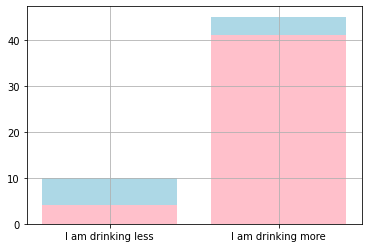

In [359]:

# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# creating dataframe
df = pd.DataFrame({
    'Name': ['I am drinking less', 'I am drinking more'],
    'A': [4.029304029304029, 41.02564102564102],
    'H': [9.89010989010989, 45.05494505494506]
})
  
# creating subplots and plotting them together
plt.grid(True)
ax = plt.subplot()
ax.bar(df["Name"], df["H"], color="lightblue")
ax.bar(df["Name"], df["A"], color="pink")

In [353]:
len(df4[(df4['Q18a']==2)&(df4['Q11']==1)])/len(df4)*100

45.05494505494506

In [278]:
len(df4)

273

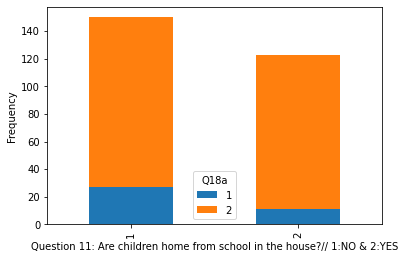

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q11','Q18a']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Question 11: Are children home from school in the house?// 1:NO & 2:YES')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

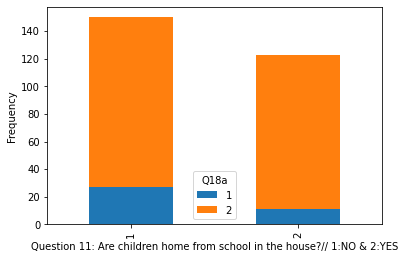

In [248]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q11','Q18a']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Question 11: Are children home from school in the house?// 1:NO & 2:YES')
plt.ylabel('Frequency')
plt.show()


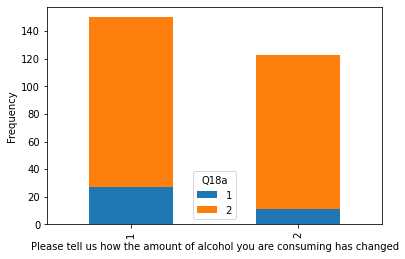

In [237]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q11','Q18a']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Please tell us how the amount of alcohol you are consuming has changed')
plt.ylabel('Frequency')
plt.show()


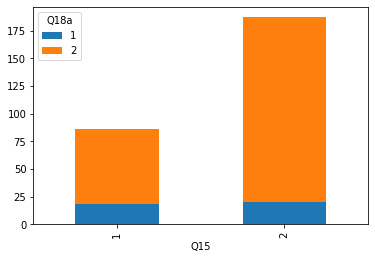

In [238]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q15','Q18a']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


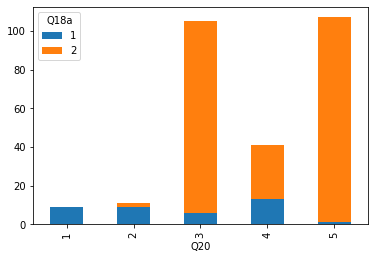

In [239]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q20','Q18a']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


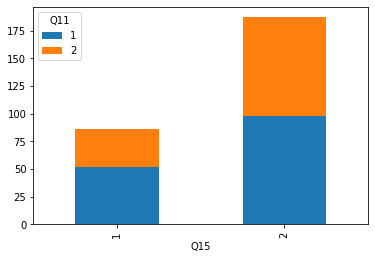

In [240]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q15','Q11']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


In [241]:
# Constructing Contingency Table
Q11Q15 = pd.crosstab(df4['Q11'],df4['Q15'],margins = False)
table= Q11Q15
print(Q11Q15)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q15   1   2
Q11        
1    52  98
2    34  89
dof=1
[[ 47.25274725 102.74725275]
 [ 38.74725275  84.25274725]]
probability=0.950, critical=3.841, stat=1.237
Independent (fail to reject H0)
significance=0.050, p=0.266
Independent (fail to reject H0)


In [242]:
# Constructing Contingency Table
Q20Q29 = pd.crosstab(df4['Q20'],df4['Q29'],margins = False)
table= Q20Q29
print(Q20Q29)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q29   1   2
Q20        
1     4   5
2     2   9
3    25  80
4     2  39
5    18  89
dof=4
[[ 1.68131868  7.31868132]
 [ 2.05494505  8.94505495]
 [19.61538462 85.38461538]
 [ 7.65934066 33.34065934]
 [19.98901099 87.01098901]]
probability=0.950, critical=9.488, stat=11.137
Dependent (reject H0)
significance=0.050, p=0.025
Dependent (reject H0)


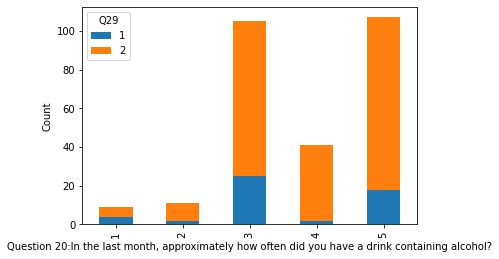

In [243]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q20','Q29']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Question 20:In the last month, approximately how often did you have a drink containing alcohol?')
plt.ylabel('Count')
plt.show()
plt.show()


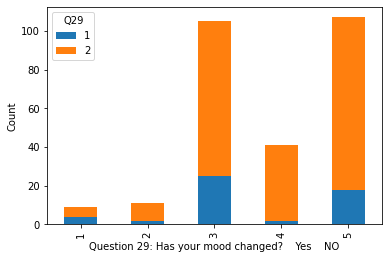

In [244]:
import matplotlib.pyplot as plt
import pandas as pd

df4.groupby(['Q20','Q29']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Question 29: Has your mood changed?    Yes    NO')
plt.ylabel('Count')
plt.show()
plt.show()


In [245]:
# Constructing Contingency Table
Q11Q29 = pd.crosstab(df4['Q11'],df4['Q29'],margins = False)
table= Q11Q29
print(Q11Q29)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Q29   1    2
Q11         
1    27  123
2    24   99
dof=1
[[ 28.02197802 121.97802198]
 [ 22.97802198 100.02197802]]
probability=0.950, critical=3.841, stat=0.027
Independent (fail to reject H0)
significance=0.050, p=0.871
Independent (fail to reject H0)


In [246]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [247]:
# load dataset
data=pd.read_csv("covidreasearchthesecondpaper.csv", index_col =0 )
data


,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q18a,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
12,4,1,1,2,2,2,1,8,9,2,2,2,1,2,2,3,5,1,1,1,1,2,2,2,2,2
13,3,2,2,1,2,1,1,6,5,2,1,1,1,2,2,3,3,1,1,2,2,2,1,2,1,2
16,3,1,1,2,2,2,2,7,7,2,1,2,1,2,2,3,5,1,1,2,3,1,1,2,2,2
18,2,1,1,2,2,2,2,7,7,1,2,1,1,2,2,2,4,1,1,2,2,2,2,1,2,2
21,2,1,1,2,2,1,1,7,6,1,1,2,2,2,2,2,5,1,1,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2,1,5,2,1,2,1,8,8,1,1,2,1,2,2,2,4,1,1,2,4,2,2,2,2,2
895,4,2,1,2,2,1,2,7,8,2,2,1,1,2,2,3,3,1,1,1,1,1,2,1,2,1
896,4,1,19,2,2,1,2,6,7,2,2,2,2,2,2,4,3,1,1,2,5,2,2,2,2,2
897,5,1,1,1,1,1,1,9,10,2,2,2,1,2,2,4,3,1,1,2,4,2,2,2,2,2
